# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

Я использую набор данных по статистике матчей чемпионата Испании по футболу - https://github.com/datasets/football-datasets/tree/master/datasets/la-liga

Эта задача является актуальной для составления статистик на спортивных ресурсах, а также для примерного прогнозирования исходов и показателей матчей.

Датасет состоит из одного файла:
- seasons-1618.csv - обучающая выборка

Файл содержит следующие колонки:
- date - дата-время в формате ГОД-МЕСЯЦ-ДЕНЬ.
- HomeTeam - название команды-хозяйки.
- AwayTeam - название гостевой команды.
- FTHG - голы домашней команды за весь матч.
- FTAG - голы гостевой команды за весь матч.
- FTR - результат матча: "H", "D" и "A".
- HTHG - голы домашней команды за первый тайм.
- HTAG - голы гостевой команды за первый тайм.
- HTR - результат первого тайма: "H", "D" и "A".
- HS - количество ударов домашней команды.
- AS - количество ударов гостевой команды.
- HST - количество ударов в створ домашней команды.
- AST - количество ударов в створ гостевой команды.
- HF - количество нарушений со стороны домашней команды.
- AF - количество нарушений со стороны гостевой команды.
- HC - количество угловых ударов домашней команды.
- AC - количество угловых ударов гостевой команды.
- HY - количество желтых карточек домашней команды.
- AY - количество желтых карточек гостевой команды.
- HR - количество красных карточек домашней команды.
- AR - количество красных карточек гостевой команды.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pointbiserialr

filename = 'seasons-1618.csv'
df = pd.read_csv(filename)

In [2]:
df.shape

(760, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      760 non-null    object
 1   HomeTeam  760 non-null    object
 2   AwayTeam  760 non-null    object
 3   FTHG      760 non-null    int64 
 4   FTAG      760 non-null    int64 
 5   FTR       760 non-null    object
 6   HTHG      760 non-null    int64 
 7   HTAG      760 non-null    int64 
 8   HTR       760 non-null    object
 9   HS        760 non-null    int64 
 10  AS        760 non-null    int64 
 11  HST       760 non-null    int64 
 12  AST       760 non-null    int64 
 13  HF        760 non-null    int64 
 14  AF        760 non-null    int64 
 15  HC        760 non-null    int64 
 16  AC        760 non-null    int64 
 17  HY        760 non-null    int64 
 18  AY        760 non-null    int64 
 19  HR        760 non-null    int64 
 20  AR        760 non-null    int64 
dtypes: int64(16), ob

In [4]:
df = df.drop_duplicates().dropna()
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,19/08/16,La Coruna,Eibar,2,1,H,0,0,D,11,...,6,6,14,17,1,8,3,3,0,0
1,19/08/16,Malaga,Osasuna,1,1,D,0,0,D,14,...,4,3,11,22,5,3,2,3,0,0
2,20/08/16,Barcelona,Betis,6,2,H,3,1,H,30,...,12,2,17,13,10,2,1,3,0,0
3,20/08/16,Granada,Villarreal,1,1,D,0,0,D,7,...,1,3,17,11,7,3,2,3,0,0
4,20/08/16,Sevilla,Espanol,6,4,H,3,3,D,16,...,11,7,8,15,8,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,19/05/18,Villarreal,Real Madrid,2,2,D,0,2,A,14,...,5,7,13,10,4,5,4,3,0,0
756,20/05/18,Ath Bilbao,Espanol,0,1,A,0,1,A,12,...,3,4,4,11,7,7,0,1,0,0
757,20/05/18,Ath Madrid,Eibar,2,2,D,1,1,D,8,...,4,3,14,14,2,2,6,2,1,0
758,20/05/18,Barcelona,Sociedad,1,0,H,0,0,D,12,...,4,2,13,13,3,8,3,2,0,0


In [7]:
team_goals = pd.DataFrame([df.groupby('HomeTeam')['FTHG'].sum(), df.groupby('AwayTeam')['FTAG'].sum()]).T
team_goals['total'] = team_goals['FTHG'] + team_goals['FTAG']
team_goals

,FTHG,FTAG,total
Alaves,40,41,81
Ath Bilbao,55,39,94
Ath Madrid,70,58,128
Barcelona,117,98,215
Betis,57,44,101
Celta,64,48,112
Eibar,55,45,100
Espanol,48,37,85
Getafe,26,16,42
Girona,26,24,50


In [6]:
df.groupby('HomeTeam')['FTHG'].describe()

,count,mean,std,min,25%,50%,75%,max
HomeTeam,,,,,,,,
Alaves,38.0,1.052632,0.898869,0.0,0.00,1.0,1.75,3.0
Ath Bilbao,38.0,1.447368,1.107648,0.0,1.00,1.0,2.00,5.0
Ath Madrid,38.0,1.842105,1.533875,0.0,1.00,1.0,3.00,7.0
Barcelona,38.0,3.078947,1.836294,0.0,2.00,3.0,4.00,7.0
Betis,38.0,1.500000,1.084286,0.0,1.00,2.0,2.00,4.0
Celta,38.0,1.684211,1.337712,0.0,0.25,2.0,3.00,4.0
Eibar,38.0,1.447368,1.483192,0.0,0.00,1.0,2.00,5.0
Espanol,38.0,1.263158,1.308686,0.0,0.00,1.0,2.00,4.0
Getafe,19.0,1.368421,1.342077,0.0,0.00,1.0,2.00,4.0


### 1. В испанской футбольной лиге среднее количество голов за один матч не превышает отметку в 3 мяча

Среднее количество голов в матче:  2.818421052631579


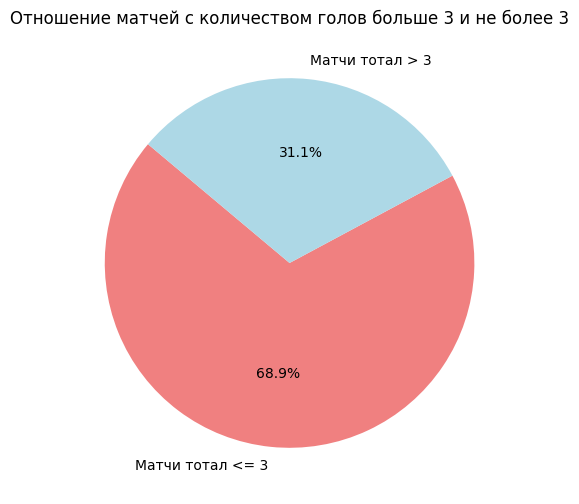

In [9]:
matches_more_3 = df
matches_more_3["TotalGoals"] = matches_more_3["FTHG"] + matches_more_3["FTAG"]

# Фильтруем матчи с количеством голов больше 3
high_scoring_matches = matches_more_3[matches_more_3["TotalGoals"] > 3]
other_matches = matches_more_3[matches_more_3["TotalGoals"] <= 3]
print('Среднее количество голов в матче: ', matches_more_3["TotalGoals"].mean())

# Подготавливаем данные для круговой диаграммы
labels = ['Матчи тотал <= 3', 'Матчи тотал > 3']
sizes = [other_matches["TotalGoals"].count(), high_scoring_matches["TotalGoals"].count()]
colors = ['lightcoral', 'lightblue']

# Строим круговую диаграмму
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Отношение матчей с количеством голов больше 3 и не более 3')
plt.show()

### 2. Если в матче команда совершила больше ударов по воротам соперника, то с высокой вероятностью она победила

In [10]:
# Функция для определения победы в матче
def determine_winner(row):
    if (row["FTR"] == "H" and row["HS"] >= row["AS"]) or (row["FTR"] == "A" and row["AS"] >= row["HS"]):
        return 1
    elif row["FTR"] != "D":
        return -1
    else:
        return 0

more_shoots = df
# Добавляем новый столбец "Win" для определения победы
more_shoots["Win"] = more_shoots.apply(determine_winner, axis=1)

# Рассчитываем точечный бисериальный коэффициент корреляции
correlation_coefficient, p_value = pointbiserialr(abs(more_shoots["HS"] - more_shoots["AS"]), more_shoots["Win"])

# Печатаем результаты
print("Точечный бисериальный коэффициент корреляции:", correlation_coefficient)
print("P-значение:", p_value)

# Определяем, есть ли статистически значимая связь
alpha = 0.01
if p_value < alpha:
    print("Есть статистически значимая связь: если команда совершает больше ударов, то с большей вероятностью побеждает.")
else:
    print("Статистически значимой связи нет.") 

Точечный бисериальный коэффициент корреляции: 0.07355930353324878
P-значение: 0.04263181950914122
Статистически значимой связи нет.


### 3. Команды чаще побеждают дома.

             home  away
La Coruna      11     3
Malaga         14     3
Barcelona      31    25
Granada         4     0
Sevilla        25    13
Ath Madrid     26    20
Sociedad       20    13
Sp Gijon        5     2
Celta          17     9
Valencia       21    14
Betis          16    12
Espanol        16    11
Eibar          18    11
Leganes        14     6
Osasuna         2     2
Real Madrid    26    25
Alaves         16    13
Ath Bilbao     19    10
Las Palmas     13     2
Villarreal     22    15
Girona          8     6
Levante         7     4
Getafe          9     6


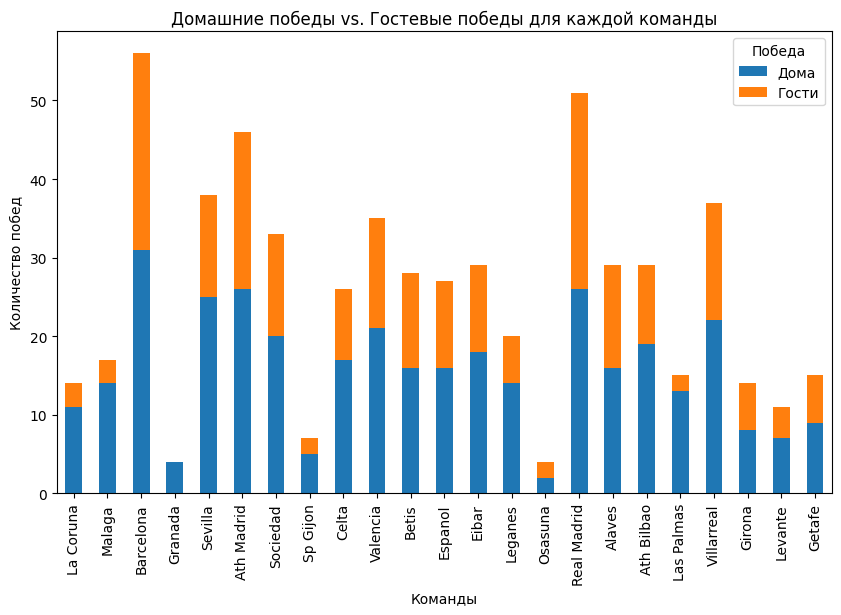

In [11]:
teams = df["HomeTeam"].unique()
dict = {}
for team in teams:
    dict[team] = dict.get(team, [0, 0])
    for _, row in df.iterrows():
        if (row["HomeTeam"] == team and row["FTR"] == "H") or (row["AwayTeam"] == team and row["FTR"] == "A"):
            dict[team][1] += 1
            if row["HomeTeam"] == team and row["FTR"] == "H":
                dict[team][0] += 1
team_stats = pd.DataFrame(dict, index=['home', 'all']).T
team_stats['away'] = team_stats['all'] - team_stats['home']
del team_stats['all']
print(team_stats)

# Строим столбчатую диаграмму
team_stats.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Домашние победы vs. Гостевые победы для каждой команды')
plt.xlabel('Команды')
plt.ylabel('Количество побед')
plt.legend(title='Победа', labels=['Дома', 'Гости'])
plt.show()

### 4. Команды, играющие в гостях, получают больше желтых карточек, чем команды-хозяйки.

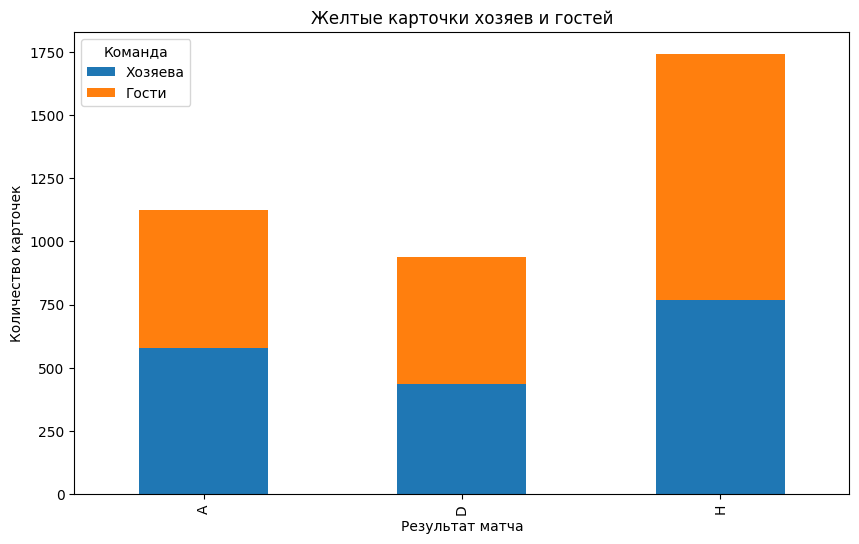

In [12]:
# Группируем данные по типу команды (хозяева или гости) и считаем сумму карточек
card_stats = df.groupby('FTR')[['HY', 'AY']].sum()

# Строим столбчатую диаграмму
card_stats.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Желтые карточки хозяев и гостей')
plt.xlabel('Результат матча')
plt.ylabel('Количество карточек')
plt.legend(title='Команда', labels=['Хозяева', 'Гости'])
plt.show()

### Корреляционный анализ

In [13]:
fields = ['HS', 'HST', 'HC', 'HY']
correlation_matrix = df[fields].corr()
print(correlation_matrix)

           HS       HST        HC        HY
HS   1.000000  0.604750  0.492844 -0.177072
HST  0.604750  1.000000  0.211688 -0.181854
HC   0.492844  0.211688  1.000000 -0.127442
HY  -0.177072 -0.181854 -0.127442  1.000000


<AxesSubplot: >

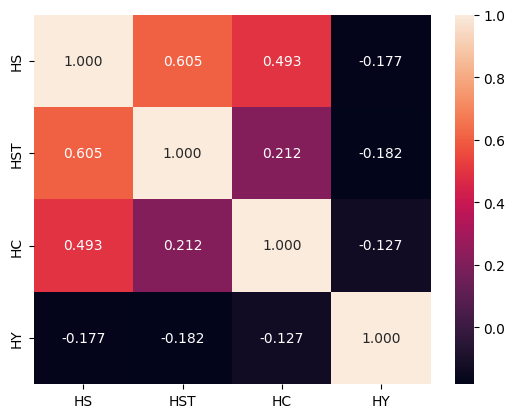

In [14]:
sns.heatmap(correlation_matrix, annot=True, fmt='.3f')